In [1]:
import numpy as np
import mlgrad.model as model
import mlgrad.loss as loss
import mlgrad.sgd as sgd

import matplotlib.pyplot as plt
plt.style.use('bmh')

%matplotlib inline

In [2]:
lm_orig = model.LinearModel([1.,2.,3])
lm_orig

In [3]:
X = np.random.random((30,2))
Y = np.array([lm_orig.evaluate(x) for x in X])

In [4]:
param_init = np.random.random((3,))
lm_learn = model.LinearModel(param_init)

In [5]:
loss_func = loss.SquareLoss()
loss_func

In [6]:
alg = sgd.SGD(lm_learn, loss_func, h=1.0, max_epoch=10000)
alg.fit(X, Y)
print("K:", alg.K)

K: 3910


In [7]:
lm_learn

In [8]:
Y_p = np.array([lm_learn.evaluate(x) for x in X])

In [9]:
np.abs(Y - Y_p) / Y

array([  3.14919695e-08,   1.75093754e-08,   3.46764076e-07,
         6.25595355e-09,   2.19167556e-07,   8.66247606e-08,
         1.83943686e-07,   1.25897783e-08,   2.08392296e-07,
         6.08238139e-08,   3.47144108e-08,   2.18828936e-07,
         6.97501713e-08,   1.77213637e-07,   8.08963853e-08,
         6.36857507e-08,   6.79517880e-08,   5.79277542e-07,
         1.31344017e-07,   2.93294618e-07,   1.75448946e-07,
         1.51376350e-07,   3.63695344e-07,   1.71298678e-08,
         2.04226971e-07,   1.58526911e-07,   2.74892428e-07,
         1.50895459e-08,   6.20707595e-07,   2.00971159e-07])

In [10]:
1.0 - np.mean(((Y - Y_p) / Y)**2)

0.99999999999994826

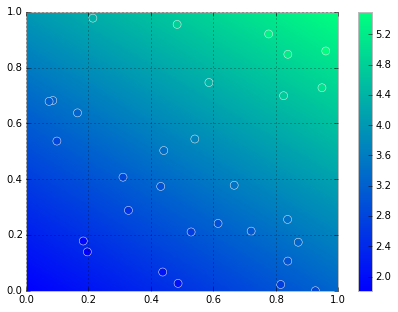

In [11]:
plt.figure(figsize=(7,5))
plt.winter()
xs = np.linspace(0.,1., 100)
ys = np.linspace(0.,1., 100)
XX, YY = np.meshgrid(xs, ys)
XY = np.c_[XX.ravel(), YY.ravel()]
ZZ = np.array([lm_learn.evaluate(xy) for xy in XY])
ZZ = ZZ.reshape(XX.shape)
sc = plt.scatter(X[:,0], X[:,1], c=Y, s=64)
plt.imshow(ZZ, origin='bottom', extent=[0.,1.,0.,1], aspect="auto")
plt.colorbar(sc)
plt.show()